# Proyek Akhir : Klasifikasi Gambar
- Nama: Isna Nur Amalia
- Email: isnanuramalia13@gmail.com
- Id Dicoding:
- GitHub: https://github.com/isnanramalia/dicoding-latihanDataMining/tree/main/proyek_akhir_machineLearning

In [71]:
import numpy as np
import pandas as pd
import random

import os
for dirname, _, filenames in os.walk('/rockpaperscissors'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
    break

In [72]:
directory = 'rockpaperscissors'
print(os.listdir(directory))

['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']


In [73]:
labels = ['paper', 'rock', 'scissors']
nb = len(labels)

In [74]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

## Dividing the images and labels

In [75]:
def input_target_split(train_dir, labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir, label)
        for image in os.listdir(folder):
            img = load_img(os.path.join(folder, image), target_size=(150, 150))
            img = img_to_array(img)
            img = img/255.0
            dataset.append([img, count])
        print(f'\rCompleted: {label}', end='')
        count += 1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [76]:
X, y = input_target_split(directory, labels)

Completed: scissors

## Visualizing the images

In [77]:
import matplotlib.pyplot as plt

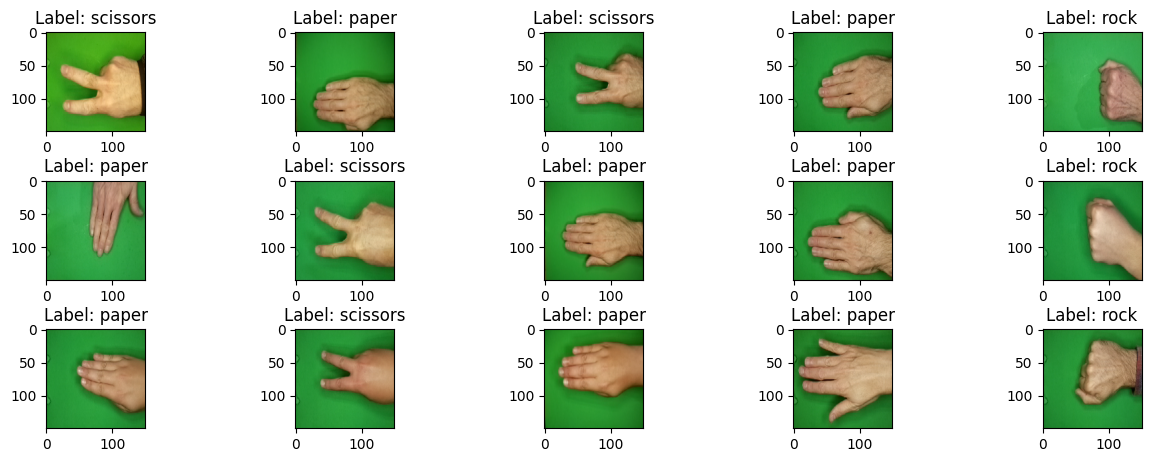

In [78]:
plt.figure(figsize=(15, 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5, 5, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [79]:
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([712, 726, 750], dtype=int64))

## Splitting the images and labels into training and test set

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([562, 564, 580], dtype=int64)) (array([0, 1, 2]), array([150, 162, 170], dtype=int64))


## Applying Data Augmentation Techniques

In [81]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2, 
                             fill_mode='nearest')

testgen =ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [82]:
y_train = np.eye(nb)[y_train]
y_test = np.eye(nb)[y_test]

## Defining CNN Model

In [83]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

## Compiling the model with its optimizer, loss function and metric

In [84]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x00000282F447C650>